# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


/home/akansha/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

In [2]:
#print data['Fresh']
print np.var(data['Fresh'])
print np.var(data['Milk'])
print np.var(data['Grocery'])
print np.var(data['Frozen'])
print np.var(data['Detergents_Paper'])
print np.var(data['Delicatessen'])
print data.corr()

159591393.495
54346171.8588
90104853.5186
23514289.8635
22680771.409
7934922.50367
                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


Answer:A very simple way to find the parameters is by using the variance for each of the feature. From the above code it is evident that 'Fresh' and then 'Grocery' have the largest variance. So these should be part of the first and the second PCA.
ICA measures the independence in the relationship between the features. In other words, ICA measures the relative differences between the features. 

A very good way of understanding the independence between features is by printing the correlation matrix. The correlation matrix gives a number that defines the correlation between the parameters. The number ranges from 0-1.0. Where 0 means badly correlated or highly independent and 1.0 means strongs correlated.

From the correlation matrix we can observe that 1> Fresh is very badly correlated (independent) to Grocer, and Detergents 2> Grocery is very independent from Frozen 3> Delicate is badly correlated to Detergents 

And, 1> Fresh has good correlation with Frozen, 2> Milk strongly correlated with Grocery 3> Grocery very strongly correlated with Detergents 4> Detergents strong with milk and very strong with grocery.

###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


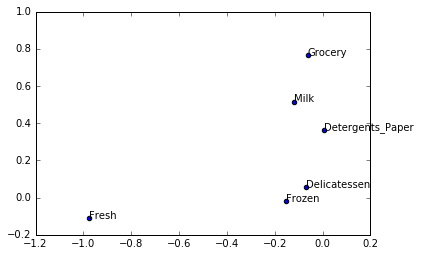

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.scatter(pca.components_[0],pca.components_[1])
#ax=plt.scatter(pca.components_[0],pca.components_[1])
ax.annotate('Fresh', (pca.components_[0][0],pca.components_[1][0]))
ax.annotate('Milk', (pca.components_[0][1],pca.components_[1][1]))
ax.annotate('Grocery', (pca.components_[0][2],pca.components_[1][2]))
ax.annotate('Frozen', (pca.components_[0][3],pca.components_[1][3]))
ax.annotate('Detergents_Paper', (pca.components_[0][4],pca.components_[1][4]))
ax.annotate('Delicatessen', (pca.components_[0][5],pca.components_[1][5]))

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: We observe from the varinace that 1st component has 45.96% of data, second has 40.517% of data, and the rest of them have less that 10% of the data. So I would chose the first two componets for the analysis.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimesions define the "direction" vector for each component. Since we have 6 features in the problem, each componet would have a contribution from each of the features in its direction. It is informative and important to understand the correlation between the pricncipal components and the original feature. 
PCA1:- [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471] This shows that "-0.9653685" has a strong negative correlation with 'Fresh'.SInce trhe mangitude is really very high (closer to 1.0) the first principal component is dominated by 'Fresh'. As the PC increase, the value for 'Fresh' decreases.
------PCA2:- [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921] This shows that 'Milk' and 'Grocery' have a high correlation with the second component. It also shows that people buying 'Milk' have a tendency to purchase 'Grocery' too. Both these parameters increase with an increase in the second principal component.

In addition, from PCA-1 we observe that 'Grocery' (-0.06) and 'Deliccatessen' (-0.6) have a similar correlation which means if one decrease the other decreases too. This means that a customer purchasing grocery purchases delicatessen too.
All the components except Detergents is negative, which means that customer do not tend to spend on Milk, Frozen, Grocery, Delicattessen and Fresh when they are purchasing Detergents.

>>>>NEW ADDITION <<
Above, a plot with the axis representing the PCA components shows that, "Fresh" is more like an outlier as compared to the other features. This means there are significant number of customers who opt for 'Fresh' food do not purchase other stuff.Similarly we observe that the 'Frozen' and 'Delicatessen' points are close to each other, this means that customer who purchase 'Frozen' tend to purchase 'Delicatessen' too.

###ICA

[[  3.97596282e-06  -8.58804422e-07  -6.27469785e-07  -6.77279603e-07
    2.06698062e-06  -1.04227439e-06]
 [  2.10733777e-07  -1.87975348e-06   6.42278616e-06   4.11383263e-07
   -8.04988405e-07  -1.45823313e-06]
 [  1.53023680e-07   9.84836364e-06  -5.80431241e-06  -3.65167925e-07
    3.29363940e-06  -6.06103841e-06]
 [  3.86495528e-07   2.19445562e-07   6.00061772e-07   5.22125539e-07
   -5.08737108e-07  -1.80922704e-05]
 [ -2.99294418e-07   2.29931519e-06   1.20639216e-05  -1.46244818e-06
   -2.82088722e-05  -5.72776175e-06]
 [  8.65179584e-07   1.40470208e-07  -7.73705063e-07  -1.11461715e-05
    5.54595060e-07   5.95211374e-06]]
ICA transform of max "Fresh" [[ 0.35902022  0.03551768  0.15006798 -0.07095678  0.02930404 -0.02733532]]
ICA-1 [  3.97596282e-06  -8.58804422e-07  -6.27469785e-07  -6.77279603e-07
   2.06698062e-06  -1.04227439e-06]
------------------------------------
ICA transform of max "Milk" [[ 0.00772083  0.01644421  0.58931832  0.03499634 -0.03436225  0.02933731]]


/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

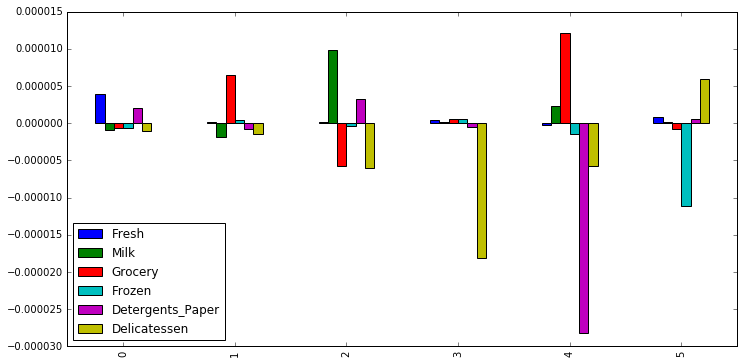

In [4]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6, random_state=1)
ica.fit(data)

# Print the independent components
print ica.components_
#print data.head()
#print data.iloc[181]
#print ica.transform(data.iloc[181])
#trans = ica.transform(data.iloc[181])
#print ica.inverse_transform(trans)

#Obtain the row with the value for maximum 'Fresh' feature
#Calcuate its ICA component
maxFresh = data.ix[data['Fresh'].idxmax()]
#print maxFresh
maxFreshTransform = ica.transform(maxFresh)
print 'ICA transform of max "Fresh"', maxFreshTransform
print 'ICA-1' , ica.components_[0,:]
print '------------------------------------'
#Obtain the row with the value for maximum 'Fresh' feature
#Calcuate its ICA component
maxMilk = data.ix[data['Milk'].idxmax()]
#print maxMilk
maxMilkTransform = ica.transform(maxMilk)
print 'ICA transform of max "Milk"',maxMilkTransform
print 'ICA-1' , ica.components_[1,:]
print '------------------------------------'
maxGrocery = data.ix[data['Grocery'].idxmax()]
maxGroceryTransform = ica.transform(maxGrocery)
print 'ICA transform of max "Grocery"',maxGroceryTransform
print 'ICA-1' , ica.components_[2,:]
print '------------------------------------'
maxFrozen = data.ix[data['Frozen'].idxmax()]
maxFrozenTransform = ica.transform(maxFrozen)
print 'ICA transform of max "Frozen"',maxFrozenTransform
print 'ICA-1' , ica.components_[3,:]
print '------------------------------------'
maxDetergents_Paper = data.ix[data['Detergents_Paper'].idxmax()]
maxDetergents_PaperTransform = ica.transform(maxDetergents_Paper)
print 'ICA transform of max "Detergents_Paper"',maxDetergents_PaperTransform
print 'ICA-1' , ica.components_[4,:]
print '------------------------------------'
maxDelicatessen = data.ix[data['Delicatessen'].idxmax()]
maxDelicatessenTransform = ica.transform(maxDelicatessen)
print 'ICA transform of max "Delicatessen"',maxDelicatessenTransform
print 'ICA-1' , ica.components_[5,:]

pd.DataFrame(ica.components_, columns=data.columns).plot(kind = 'bar', figsize = (12, 6))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: ICA c onverts a multivariate dataset to additive individual components. The resulting matrix above is the ICA components. Each vector corresponds to a component, and it defines the independence with respect to other features. These components help in projecting the data from ICA axis to the original axis. The row feature can be reconstructed by a linear combination of the columns in that specific row.
1> First vector :- ICA transform of max "Fresh" [[ 0.35902022  0.03551768  0.15006798 -0.07095678  0.02930404 -0.02733532]]
ICA-1 [  3.97596282e-06  -8.58804422e-07  -6.27469785e-07  -6.77279603e-07
   2.06698062e-06  -1.04227439e-06] This shows that the ICA1 component for the first feature is the largest, and the score for the 'max' 'Fresh' row has the first elemnt as the highest. 
2> Second vector :- ICA transform of max "Milk" ICA transform of max "Milk" [[ 0.00772083  0.01644421  0.58931832  0.03499634 -0.03436225  0.02933731]]
ICA-1 [  2.10733777e-07  -1.87975348e-06   6.42278616e-06   4.11383263e-07
  -8.04988405e-07  -1.45823313e-06]  This shows that the ICA1 component for the third element is the largest, and the score for the 'max' 'Milk' row has the third elemnt as the highest. In this independent component vector , 'Milk' and 'Grocery' are independent. 
3> Third vector :- ICA transform of max "Grocery" [[ 0.00678324  0.43630408  0.02326319  0.01531153  0.03949266 -0.00410011]]
ICA-1 [  1.53023680e-07   9.84836364e-06  -5.80431241e-06  -3.65167925e-07
   3.29363940e-06  -6.06103841e-06] This shows that the ICA1 component for the second element is the largest, and the score for the 'max' 'Grocery' row has the second elemnt as the highest. This shows that 'Grocery' and 'Delicatessen' are independent.
   4> Fourth vecto :- ICA transform of max "Frozen" [[ 0.02264346  0.03927576  0.02728269 -0.02907174  0.02500713 -0.60572289]]
ICA-1 [  3.86495528e-07   2.19445562e-07   6.00061772e-07   5.22125539e-07
  -5.08737108e-07  -1.80922704e-05] This shows that the ICA1 component for the sixth element is the largest, and the score for the 'max' 'Frozen' row has the sixth elemnt as the highest. This also shows that someone who is purchasing 'Delicatessen' is highly unlikely to purchase other products. 
  5> Fifth vector :- 'Detergent' and 'Grocery' are anti associated,this means that people either opt to purchase 'Detergent' OR 'Grocery'. This shows that 'Grocery' purchase and 'Detergent' are isolated.
  6> Sixth vector :- 'Frozen' and 'Delicatessan' are anti associated this means that people either opt to purchase 'Frozen' OR 'Delicatessen'.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 1> Gaussian mixtures are not scalable but K-means is scalable. 2> Gaussian mixture models can be though of a generalized form of K-Means with taking into account the covariance structure. 3> KMeans are faster than Gaussian Mixture models 4> However, The advantage of GMM over clustering is that in GMM, every sample has a likelihood number, therefore in cases where the samples cannot be discretelly assigned to a cluster, these samples would get likelihood number from both the cluster. Particularly, this is useful for non distinguishable samples. But again, the issue is with computation time and space 5> when there are many points per mixture, computation of the covarianc ematrix is expensive and it might find solutions with infinite likelihood, but this is not the case with K-Means clustering 6> One of the disadvantages of GMM is that it tends to move into local optima and apparently it strongly depends on the initial values and this issue can be fixed by evaluating GMM at several intial points, again this is computationally expensive. 7. One more advantage of GMM is that it esimates the co-variance for every cluster, which can be used to reveal the shape of the cluster.
This data is suited for K-Means clustering because of a small number of features and not a large amount of samples.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.decomposition import PCA


In [6]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10] #print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters = KMeans(init='k-means++', n_clusters=2, n_init=10)
clusters.fit(reduced_data)
#clusters = ?
print clusters



KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]


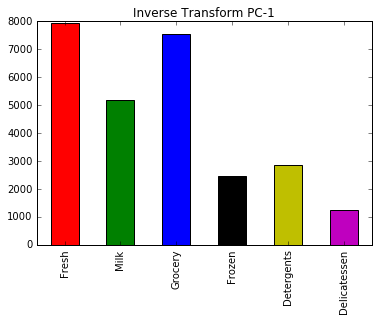

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids
x = range(6)
result = pca.inverse_transform(centroids)
#plt.bar(x,result[0,:])
#plt.bar(x,result[1,:])

s = pd.Series(
    result[0,:],
    index = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents","Delicatessen"]
)
#Plot the data:
my_colors = 'rgbkymc'  #red, green, blue, black, etc.
import pandas as pd
s.plot(kind='bar', color=my_colors)
plt.title("Inverse Transform PC-1")
plt.show()

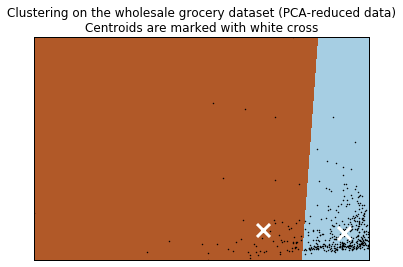

In [10]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

2-Clusters
[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]

3-Clusters
[[  1497.13461172  24998.27760147]
 [  4106.90273941  -3168.41202086]
 [-24220.71188261  -4364.45560022]]

4-Clusters
[[  5710.98964991  12661.45687292]
 [  3542.08605212  -4936.7212132 ]
 [-14537.71774395  61715.67085248]
 [-24220.71188261  -4364.45560022]]
 
5-Clusters 
 [[ -9052.39957144  -4808.55909102]
 [  5607.91709853  14199.18040025]
 [  6399.7117556   -4169.29690862]
 [-14537.71774395  61715.67085248]
 [-37704.64157991  -5488.35405895]]

The classification based on the number of clusters is given in the following figures for 2,3,4 and 5 clusters. The corresponding centroids are presented above.

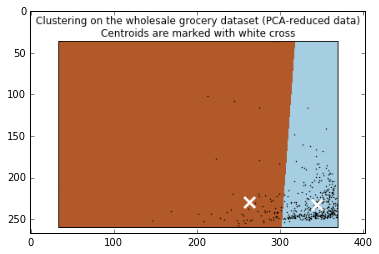

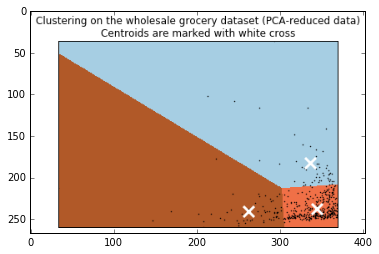

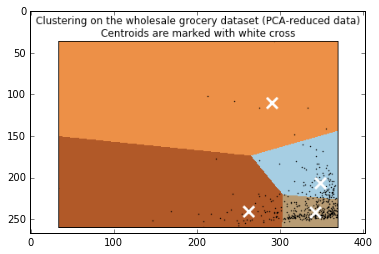

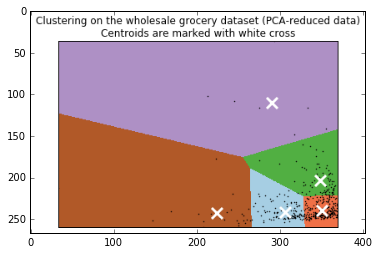

In [11]:
plt.figure(2)

im1 = plt.imread(('/home/akansha/Pictures/2clusters.png'))
imgplot1 = plt.imshow(im1)

plt.figure(3)

im2 = plt.imread(('/home/akansha/Pictures/3clusters.png'))
imgplot2 = plt.imshow(im2)

plt.figure(4)

im3 = plt.imread(('/home/akansha/Pictures/4clusters.png'))
imgplot3 = plt.imshow(im3)

plt.figure(5)

im4 = plt.imread(('/home/akansha/Pictures/5clusters.png'))
imgplot4 = plt.imshow(im4)


**7)** What are the central objects in each cluster? Describe them as customers.

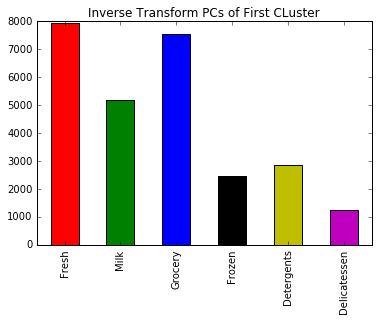

In [12]:
s = pd.Series(
    result[0,:],
    index = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents","Delicatessen"]
)
#Plot the data:
my_colors = 'rgbkymc'  #red, green, blue, black, etc.
import pandas as pd
s.plot(kind='bar', color=my_colors)
plt.title("Inverse Transform PCs of First CLuster")
plt.show()

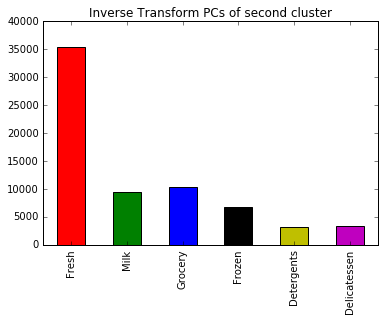

In [13]:
s = pd.Series(
    result[1,:],
    index = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents","Delicatessen"]
)
#Plot the data:
my_colors = 'rgbkymc'  #red, green, blue, black, etc.
import pandas as pd
s.plot(kind='bar', color=my_colors)
plt.title("Inverse Transform PCs of second cluster")
plt.show()

Answer: 
[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]
The principal components with TWO components is given by, [[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]]
 Using the principal components the source vectors of the centroids can be obtained using inverse_transform(X) method.
 
 Discussion about 2-cluster customers:-
 
 1? From the above plot , "Inverse Transform PCs of first cluster" we observe that the first cluster has customers who purchase 'Fresh' as compared to other products. It is  a cluster of customers who purchase only (kind of) 'Fresh' food.
 2> From , ""Inverse Transform PCs of first cluster" we present a ste of customers who purchase 'Frsh', 'Milk' and 'Grocery' 


###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I think PCA gave me a good insight into data. PCA helped me understand the direction and the variance. In addition with respect to reduction due to clustering, transformation due tp PCA and ICA gave a much accurate prediction. I would prefer PCA or ICA over KMeans clustering.
1> In addition, PCA with the principal components present a microscopic view of how each feature influences a sample.
2> These componets can be used to infer about influential features and therefore whould help customer in designing experiments.
Clustering presents a good way in distinguishing the observations, but it does not present any idea about the correlation nor the independence among the features. Clustering is amethod for grouping "liked" observateions together but does not talk about grouping the features. PCA does order reduction by axis transformation.  by grouping the features. I would use PCA for order redcution and would also clustering for grouping 'liked' observations.

**9)** How would you use that technique to help the company design new experiments?

Answer: Perform an A/B Test. A/B testing performed by testing each feature one by one. 
From the two clusters we can infer that there are a large number of  small-volume customer and a small number of large-volume customer. When the company tried changing the delivery method, probably the small-volume customers wer affected that had a bad impact to the sales.

So the A/B test should be such that it affects one of the segments (small-volume or large-volume) progressively and has no effect on the other segemnt, this will enure a higher revenue for the company.

One of the A/B tests would be to give a small amount of discount to large-volume customers and see if it affects the over all sales. 
The steps are,

1> Randomly choose a customer and give him a discount of 2% on sales.
2> A small-volume customer would not have a huge savings (non-zero though) while a large-volume customer would see a significant saving. 
3> The company would keep track of if this experiment is increasing sales.
4> If the increase in sale is greater that the  total amount of discount then it means that the experiment is successful otherwise the loss would be a maximum of 1%.



**10)** How would you use that data to help you predict future customer needs?

Answer: From the current analysis, we observe that we can label the samples based on the cluster they belong to. Assuming a 5 cluster case, we can easily label the customer type based on the sample's position in the cluster. Let us say we define customer type as CustType-1,CustType-2,CustType-3,CustType-4 and CustType-5. These are classifier types of each cluster. Let us say we add a new target "customer satisfaction (CUSTSAT)". And we have FIVE different classification for customer satisfaction. We assign each cluster to one discrete CUSTSAT classification. Then we addd the CUSTSAT as a labelled column to the data. Now build a classifier model. Then when we get a new customer we can easily map him to the specific cluster and predict his CUSTSAT.